# Dependencies and SetUp

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

# Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : kayerkan
Processing Record 2 of Set 1 : mataura
Processing Record 3 of Set 1 : koungou
Processing Record 4 of Set 1 : severo-kurilsk
Processing Record 5 of Set 1 : nyurba
City not found. Skipping...
Processing Record 6 of Set 1 : zhigansk
Processing Record 7 of Set 1 : chokurdakh
Processing Record 8 of Set 1 : birao
Processing Record 9 of Set 1 : ushuaia
Processing Record 10 of Set 1 : yellowknife
Processing Record 11 of Set 1 : westport
City not found. Skipping...
Processing Record 12 of Set 1 : caravelas
City not found. Skipping...
Processing Record 13 of Set 1 : albany
Processing Record 14 of Set 1 : vredendal
Processing Record 15 of Set 1 : jiangyou
Processing Record 16 of Set 1 : saskylakh
Processing Record 17 of Set 1 : coquimbo
Processing Record 18 of Set 1 : resistencia
Processing Record 19 of Set 1 : chuy
Processing Record 20 of Set 1 : hithadhoo
Processing Record 21 of Set 1 : puerto ayora


# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a Data Frame with the retrieve data
city_dict = pd.DataFrame({
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list
            })

In [24]:
# Dispaly DataFrame
city_dict.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kayerkan,69.3497,87.7602,35.13,97,100,12.46,RU,1632081430
1,Mataura,-46.1927,168.8643,39.47,96,32,3.87,NZ,1632081431
2,Koungou,-12.7336,45.2042,76.71,78,90,14.97,YT,1632081431
3,Severo-Kuril'sk,50.6789,156.1250,50.45,97,100,12.35,RU,1632081158
4,Nyurba,63.2842,118.3319,23.85,91,10,2.26,RU,1632081432


In [25]:
# Describe DataFrame
city_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,20.603713,16.174378,65.468085,70.823932,56.965812,7.985726,1.632082e+09
std,33.501949,89.920288,17.814922,20.892782,39.041279,5.307332,1.049213e+02
min,-54.800000,-179.166700,15.240000,9.000000,0.000000,0.000000,1.632081e+09
25%,-7.598900,-65.102300,52.450000,60.000000,17.000000,3.940000,1.632081e+09
50%,25.700000,21.516700,68.360000,76.000000,69.000000,6.910000,1.632082e+09
75%,49.758000,97.321700,79.210000,87.000000,98.000000,11.250000,1.632082e+09
max,78.218600,179.316700,106.090000,100.000000,100.000000,31.070000,1.632082e+09


In [7]:
# Store data into csv file
city_dict.to_csv(output_data_file, index = False)

# Inspect the data and remove the cities where the humidity > 100%
* Skip this step if there are no cities that have humidity > 100%.

In [8]:
# Check if there is any city with humidity over 100%
humidity_over_100 = city_dict.loc[city_dict['Humidity']>100]

In [9]:
# Count how many cities are over 100%
city_list_hum_over_100 = humidity_over_100.value_counts().tolist()

if city_list_hum_over_100:
    print(f'There are a total of {len(city_list_hum_over_100)} cities with humidity over 100%')
else:
    print('There are 0 cities with humidity over 100%')

There are 0 cities with humidity over 100%


Since there is no city over 100% in Humidity we can skip the cleaning process and continue with the steps

# Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

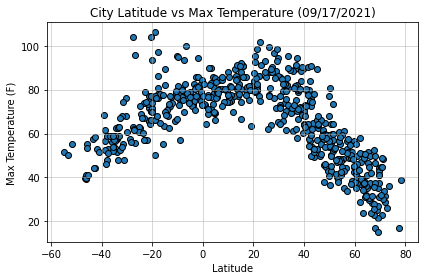

Max temperature is 106.09 F at Ladário with latitude at -19.0047


In [10]:
latitude = city_dict['Lat']
max_temp = city_dict['Max Temp']

city_with_max_temp = city_dict.loc[city_dict['Max Temp'] == city_dict['Max Temp'].max()]

# plotting scatter graph (latitude vs max_temp)
plt.scatter(latitude, max_temp,edgecolors= "black")

# Addign Title
plt.title('City Latitude vs Max Temperature (09/17/2021)')

# Addign Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Adding grid
plt.grid(alpha=0.5, linewidth= 1)

# Tight layout for better presentation and save image
plt.tight_layout()
plt.savefig("Images/City Latitude vs Max Temperature.png")

# Show graph
plt.show()

print(f"Max temperature is {city_dict['Max Temp'].max()} F at {''.join(map(str,city_with_max_temp['City'].unique()))} with latitude at {''.join(map(str,city_with_max_temp['Lat'].unique()))}")

From the graph City Latitude vs Max Temperature, we can observe that as latitude increase or decrease, the temperature drops

##  Latitude vs. Humidity Plot

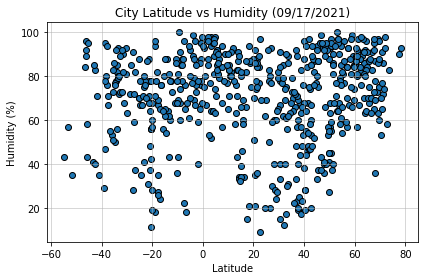

In [11]:
humidity = city_dict['Humidity']

# Plotting scatter graph of latitude vs humidity
plt.scatter(latitude, humidity, edgecolors='black')

# Adding Title
plt.title('City Latitude vs Humidity (09/17/2021)')

# Addign Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Adding grid
plt.grid(alpha=0.5, linewidth= 1)

# Tight layout for better presentation and save image in png
plt.tight_layout()
plt.savefig("Images/City Latitude vs Humidity.png")

# Show graph
plt.show()

From City Latitude vs Humidity, we can observe that there is an evenly distribution across the graph. However, most cities are found witihin +60% Humidity

##  Latitude vs. Cloudiness Plot

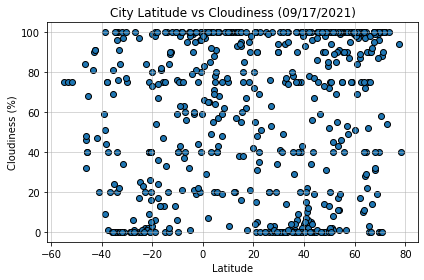

In [12]:
cloudiness = city_dict['Cloudiness']

# Plotting scatter graph of latitude vs humidity
plt.scatter(latitude, cloudiness, edgecolors='black')

# Adding Title
plt.title('City Latitude vs Cloudiness (09/17/2021)')

# Addign Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Adding grid
plt.grid(alpha=0.5, linewidth= 1)

# Tight layout for better presentation and save image
plt.tight_layout()
plt.savefig("Images/City Latitude vs Cloudiness.png")

# Show graph
plt.show()

From City Latitude vs Cloudiness, we can observe that all the dataset are spread across the graph. This could mean that there is no correlation between the two of them

##  Latitude vs. Wind Speed Plot

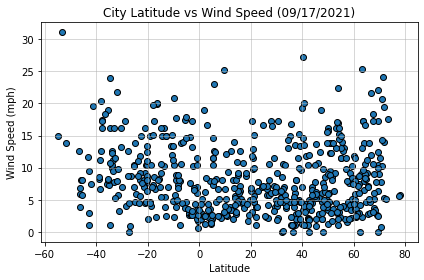

In [13]:
Wind_Speed = city_dict['Wind Speed']

# Plotting scatter graph of latitude vs humidity
plt.scatter(latitude, Wind_Speed, edgecolors='black')

# Adding Title
plt.title('City Latitude vs Wind Speed (09/17/2021)')

# Addign Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Adding grid
plt.grid(alpha=0.5, linewidth= 1)

# Tight layout for better presentation and save image
plt.tight_layout()
plt.savefig("Images/City Latitude vs Wind Speed.png")

# Show graph
plt.show()

From City Latitude vs Wind Speed, we observe that most of the cities wind speed are below 15 mph

#  Linear Regression
##  Northern Hemisphere and Southern Hemisphere

In [14]:
# Create Northen and Southern Hemisphere
nothern_hemisphere = city_dict.loc[city_dict['Lat'] >= 0]
southern_hemisphere = city_dict.loc[city_dict['Lat'] < 0]

In [30]:
# Create a reusable function to calculate the regression line of a specific chart and return the line_eq
# It also graph the scatter plot and the line_eq into one graph and set xlable to latitude
def regression_line(x,y):
    slope, intercept, r, _, _ = linregress(x,y)
    print(f"The r-value is: {r}")
    regress_value = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y,edgecolors='black')
    plt.xlabel('Latitude')
    plt.plot(x,regress_value,"r-")
    return line_eq

# Create a reusable function to plot the regression line into the graph
# (h,w) are the location to draw the line
def annotate(line_eq,h,w):
    plt.annotate(line_eq,(h,w),fontsize=15,color='r')

## Northern Hemisphere - Temperature (F) vs. Latitude

The r-value is: -0.8097508397708284


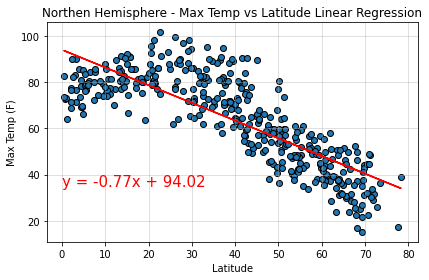

In [31]:
lat_north = nothern_hemisphere['Lat']
temp_north = nothern_hemisphere['Max Temp']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_north,temp_north)
annotate(line_to_draw, 0,35)

# Add title and labels
plt.title("Northen Hemisphere - Max Temp vs Latitude Linear Regression")
plt.ylabel('Max Temp (F)')

# Tight graph, grid and save image
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Images/Northen Hemisphere - Max Temp vs Latitude Linear Regression.png")

# Show image
plt.show()

From Northen Hemisphere - Max Temp vs Latitude Linear Regression, we can conclude that the cities found on the Northen Hemisphere, the closer you get to a greater positive latitude, the temperature drops.
Also, the r-value represent a strong negative correlation between latitude vs temperature

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7180402782405862


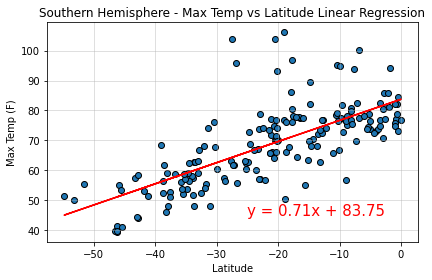

In [32]:
lat_south = southern_hemisphere['Lat']
temp_south = southern_hemisphere['Max Temp']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_south,temp_south)
annotate(line_to_draw, -25,45)

# Add title and labels
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.ylabel('Max Temp (F)')

# Tight graph, grid and save image
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Images/Southern Hemisphere - Max Temp vs Latitude Linear Regression.png")

# Show image
plt.show()

From Southern Hemisphere - Max Temp vs Latitude Linear Regression, we can conclude that the cities found on the Southern Hemisphere tendt to get warmer the closer it gets to latitude 0.
Also, the r-value represent a strong positive correlation between latitude vs temperature

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10253797746210344


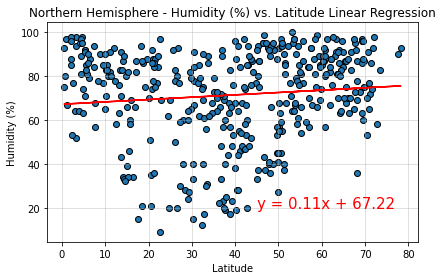

In [33]:
hum_north = nothern_hemisphere['Humidity']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_north,hum_north)
annotate(line_to_draw, 45,20)

# Add title and labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel('Humidity (%)')

# Tight graph, grid and save image
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Show image
plt.show()

From Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression, we can say that the further you go to a greater positive latitude, the percent humidity increase. However, the r-value has a
weak positive correlation betwenn Latitude and Humidity on the Northen Hemisphere

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10275019637714251


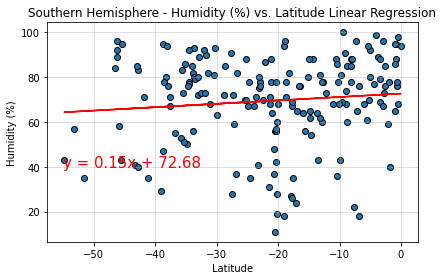

In [34]:
hum_south = southern_hemisphere['Humidity']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_south,hum_south)
annotate(line_to_draw, -55,40)

# Add title and labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel('Humidity (%)')

# Tight graph, grid and save image
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Show image
plt.show()

We can observe that as latitude get closer to 0, the percent humidity of the city will increase.
However, the r-value indicate that it has a weak positive correlation between Humidity and latitude on the Southern Hemisphere

##  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04234363392661915


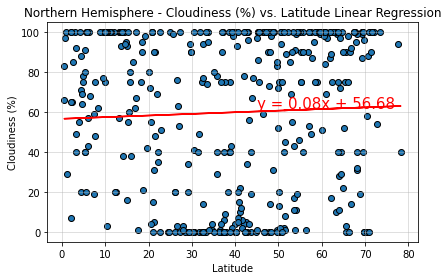

In [35]:
cloud_north = nothern_hemisphere['Cloudiness']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_north,cloud_north)
annotate(line_to_draw, 45,62)

# Add title and labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel('Cloudiness (%)')

# Tight graph, grid and save image
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Show image
plt.show()

We can oberve that the data points are widely spread across the latitude on the Northen Hemisphere. 
The linear regression indicates that the greater the altitude the percent of cloudiness increase on the Northen Hemispher
The r-value is very close to 0, indicating that there is no correlation between cloudiness % vs Latitude

##  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16564533077164295


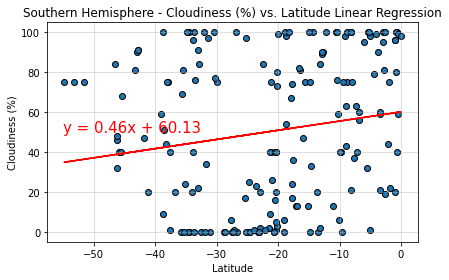

In [37]:
cloud_south = southern_hemisphere['Cloudiness']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_south,cloud_south)
annotate(line_to_draw, -55,50)

# Add title and labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel('Cloudiness (%)')

# Tight graph, grid and save image
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Show image
plt.show()

We can observe that the data points are spread across the graph and the linear regression indicates that the closer the latitude gets to 0, the higher percent of cloudiness is found on the Southern Hemisphere
The r-square value indicates that there is a weak positive correlation between 

##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17242658127259136


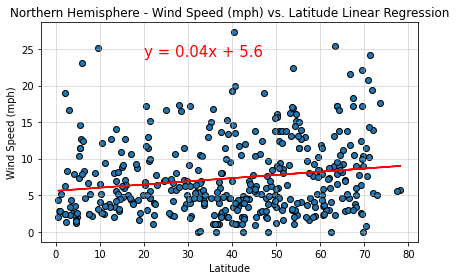

In [39]:
wind_north = nothern_hemisphere['Wind Speed']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_north,wind_north)
annotate(line_to_draw, 20,24)

# Add title and labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel('Wind Speed (mph)')

# Tight graph, grid and save image
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Show image
plt.show()

We can observe that the data points on the Northen Hemisphere are widely spread across the 3th and 4th quadrant of the graph. The r-value has a weak positive correlation between wind speed and latitude

##  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2246010460454072


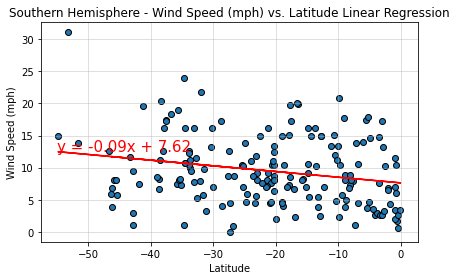

In [40]:
wind_south = southern_hemisphere['Wind Speed']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_south,wind_south)
annotate(line_to_draw, -55,12.5)

# Add title and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel('Wind Speed (mph)')

# Tight graph, grid and save image
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Show image
plt.show()

We can observe that the data points for the Southern Hemisphere are widely spread across the graph. It's r-value indicates that the data points have a negative weak correlation between wind speed and latitude